# Solución al problema del costo de un seguro

Primeramente se realizará un preprocesamiento de la información, es decir, se realizará una lectura del archivo .csv y lso datos se guardarán en forma de un arreglo para su posterior uso.

In [36]:
#Importación de librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Adquisición de datos del dataset
path = "dataset/"
file = "insurance.csv"
insurance_file = pd.read_csv(path + file)
print(insurance_file)
insurance_file.columns

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

De la lectura e impresión de los datos del archivo *csv* es posible notar que cuenta con 7 columnas: 
- Age
- Sex
- bmi
- Children
- Smoker
- Region
- Charges

Los datos se usarán crudos, a excepción de la columna *"Smoker"* la cual será cambiada de "yes" y "no" a True y False, respetivamente, para un mejor procesamiento (**NOTA: VERIFICAR SI ESTO REALMENTE VALE LA PENA**). El siguiente paso será pasar los datos leidos con la libreria *pandas* del tipos Series a listas, de ese modo se manipulará de una forma cómoda en los siguientes pasos.

In [83]:
#Preprocesamiento de datos
insurance_file["sex"] = [(1.0, 2.0)["female"==s] for s in insurance_file["sex"]]
insurance_file["smoker"] = [(1.0, 2.0)["yes"==s] for s in insurance_file["smoker"]]
insurance_file["region"] = [(s, 1.0)["northeast"==s] for s in insurance_file["region"]]
insurance_file["region"] = [(s, 2.0)["northwest"==s] for s in insurance_file["region"]]
insurance_file["region"] = [(s, 3.0)["southeast"==s] for s in insurance_file["region"]]
insurance_file["region"] = [(s, 4.0)["southwest"==s] for s in insurance_file["region"]]

print(insurance_file["region"])

0       4.0
1       3.0
2       3.0
3       2.0
4       2.0
       ... 
1333    2.0
1334    1.0
1335    3.0
1336    4.0
1337    2.0
Name: region, Length: 1338, dtype: float64


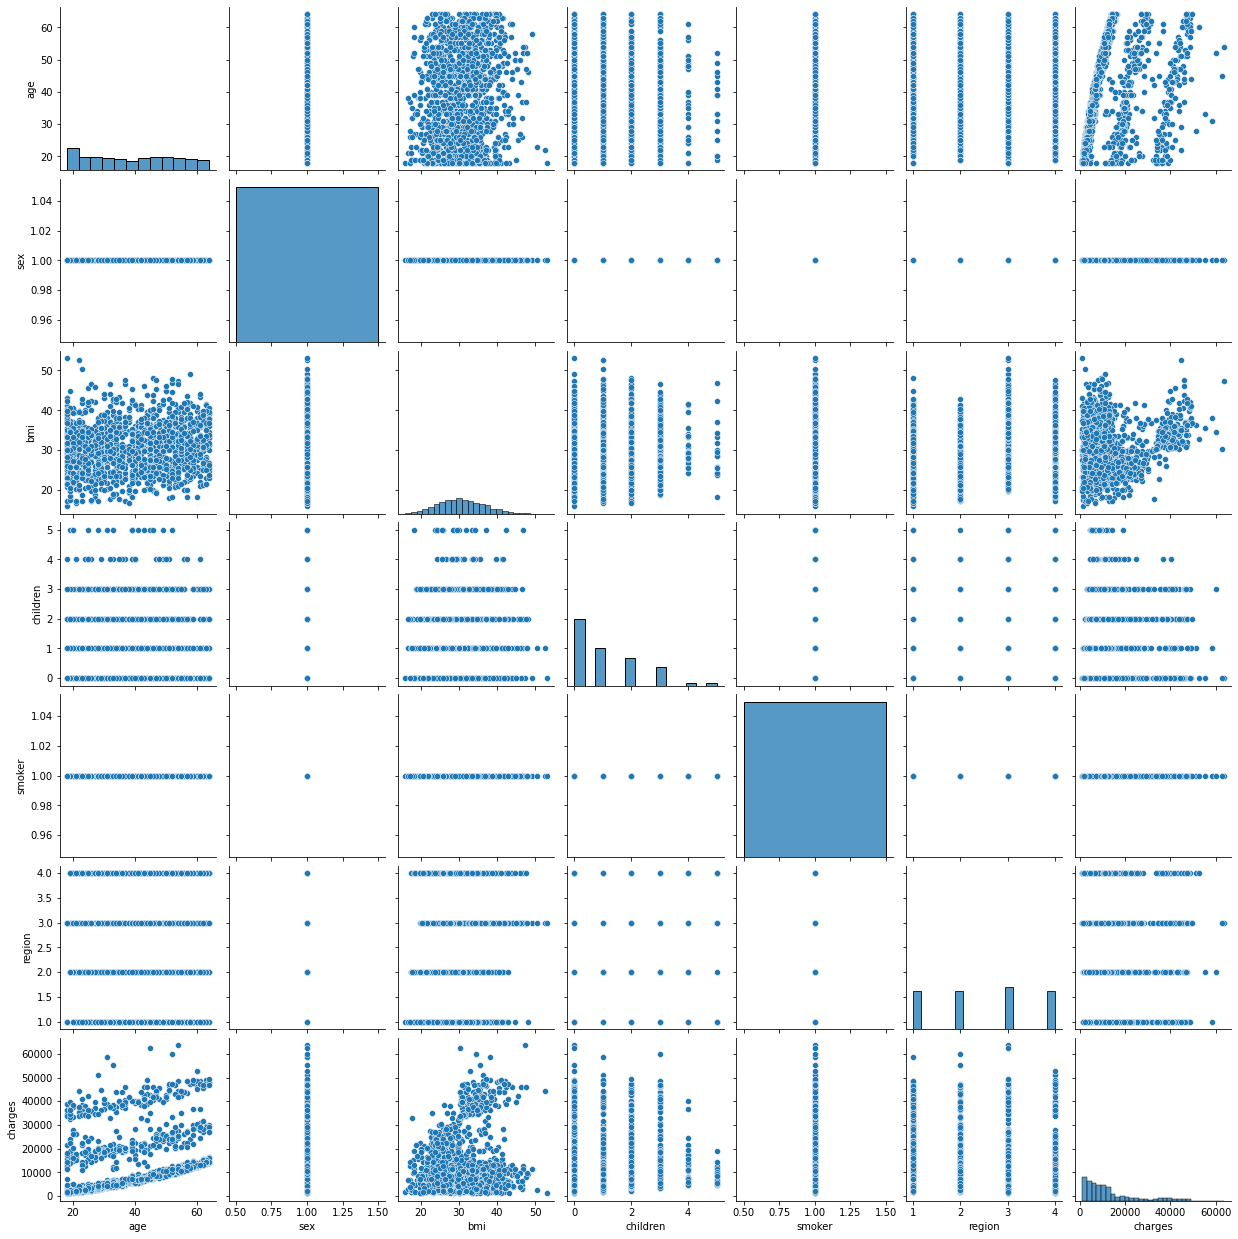

In [84]:
sns.pairplot(insurance_file)
plt.show()

In [85]:
#Seleccionamos los conjuntos de datos
x = np.array(insurance_file[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], dtype=float) #verificar smoker, sex y region
#x = np.array(insurance_file[['bmi', 'age', 'children']], dtype=float) #verificar smoker, sex y region
y = np.array(insurance_file[['charges']], dtype=float)
#Dividimos los datos en conjuntos de entrenamiento y prueba
seed = 97
test = 0.20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=seed)

In [81]:
#Entrenando
#Sacamos los valores que nos interesan del dataset en forma de arreglo
#qty = np.shape(age) # Término independiente 
#x = np.array([age, sex, bmi, smoker, np.ones(qty)], dtype=float).T #Combinación de 5 columnas (age, sex, bmi, smoker y region)
#Ecuación Normal para hallar los pesos
w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

print(f"Las dimensiones de x son: {np.shape(x_train)}")
print(f"Los pesos hallados son: {w}")

Las dimensiones de x son: (1070, 2)
Los pesos hallados son: [[163.95878387]
 [216.84099174]]


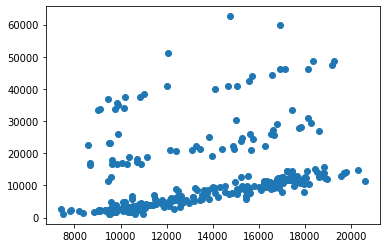

In [82]:
y_pred = x_test @ w
plt.scatter(y_pred, y_test)

**Lo siguiente está obsoleto:**

In [10]:
#Pasando los datos a listas para una manipulación posterior
age = insurance_file["age"].tolist()
sex = [(1.0, 0.0)["female"==s] for s in insurance_file["sex"].tolist()]
bmi = insurance_file["bmi"].tolist()
smoker = [(1.0, 0.0)["yes"==s] for s in insurance_file["smoker"].tolist()]
region = insurance_file["region"].tolist()
charges = insurance_file["charges"].tolist()


Seguidamente, se procederá a realizar una estimación mediante la fórmula de la normal 


**VER SI EL TÉRMINO INDEPENDIENTE ES NECESARIO**


**FALTA REALIZAR UN PREPROCESAMIENTO DE LA COLUMNA REGIÓN**

In [55]:
#Sacamos los valores que nos interesan del dataset en forma de arreglo
qty = np.shape(age) # Término independiente 
#x = np.array([age, sex, bmi, smoker, np.ones(qty)], dtype=float).T #Combinación de 5 columnas (age, sex, bmi, smoker y region)
x = np.array([age, sex, bmi, smoker], dtype=float).T #Combinación de 5 columnas (age, sex, bmi, smoker y region)
y = np.array(charges)

#Ecuación Normal para hallar los pesos
w = np.linalg.inv(x.T @ x) @ x.T @ y

print(f"Las dimensiones de x son: {np.shape(x)}")
print(f"Los pesos hallados son: {w}")

Las dimensiones de x son: (1338, 4)
Los pesos hallados son: [   313.4412873     560.34043337    586.23860306 -22152.25908289]
